### CNN (Convolutional Neural Network), 합성곱 신경망  
- 실제 이미지 데이터는 분류 대상이 이미지에서 고정된 위치에 있지 않고 분류 대상이 고정된 위치에 있지 않은 경우가 대부분이다.
- 실제 이미지 데이터를 분류하기 위해서는, 이미지의 각 feature 들을 그대로 학습하는 것이 아닌, CNN으로 패턴을 인식한 뒤 학습해야 한다.

<div style="display: flex; width:70%; margin-bottom: 30px;">
    <div>
        <img src="./images/dogs01.png" width="500" style="margin-left: 20px">
    </div>
    <div>
        <img src="./images/dogs02.png" width="720" style="margin-left: 80px">
    </div>
</div>  

- 이미지의 크기가 커질 수록 굉장히 많은 Weight가 필요하기 때문에, 분류기에 바로 넣지 않고, 이를 사전에 추출 및 축소 해야 한다.

- CNN은 인간의 시신경 구조를 모방한 기술로써, 이미지의 패턴을 찾을 때 사용한다.

- Feature Extraction을 통해 각 단계를 거치면서, 함축된 이미지 조각으로 분리되고, 각 이미지 조각을 통해 이미지의 패턴을 인식한다.  
<img src="./images/cnn01.png" width="720">

- CNN은 분류하기에 적합한 최적의 feature를 추출하고, 최적의 feature를 추출하기 위한 최적의 Weight와 Filter를 계산한다.
<img src='./images/cnn02.png' width="520">


#### Filter  
- filter 개수 -> object 개수, bias에 반영된다. (필터 안에 커널이 있고, 커널의 개수는 채널의 개수와 같다. 커널의 사이즈는 정해져있지 않음)
- 보통 정방 행렬로 구성되어 있으며, 원본 이미지에 슬라이딩 윈도우 알고리즘을 사용하여 순차적으로 새로운 픽셀 값을 만들면서 적용한다.
- 사용자가 목적에 맞는 특정 필터를 만들거나, 기존에 설계된 다양한 필터를 선택하여 이미지에 적용한다.
  하지만, CNN은 최적의 필터(필드)값을 학습하여 스스로 최적화한다.

<img src="./images/filter.gif" width="400" style="margin-left: 0px; margin-top: -30px; margin-bottom: -50px">
<img src="./images/filter.png" width="500" style="margin-left: 0;">  

- 필터 하나 당, 이미지의 채널 수 만큼 Kernel이 존재하고, 각 채널에 할당된 필터의 커널을 적용하여 출력 이미지를 생성한다.
- 출력 feature map의 개수는 필터의 개수와 동일하다.

<img src="./images/filter_channel.gif" width="500">  

#### Kernel  
- filter 안에 1 ~ n개의 커널이 존재한다. 커널의 개수는 반드시 이미지의 채널 수와 동일해야 한다.
- Kernel Size는 가로 X 세로를 의미하며, 가로와 세로는 서로 다를 수 있지만 보통은 일치시킨다.
- Kernel Size가 크면 클 수록, 입력한 이미지에서 더 많은 feature 정보를 가져올 수 있지만,

  큰 사이즈의 Kernel로 Convolution Backbone을 할 경우, 훨씬 더 많은 연산량과 파라미터가 필요하다.


<img src="./images/kernel.gif" width="500">  


#### Stride  
- 입력 이미지에 Convolution Filter를 적용할 때 Sliding Window가 이동하는 간격을 의미한다.
- 기본 stride는 1이지만, 2를 적용하면 입력 feature map 대비 출력 feature map의 크기가 절반정도 줄어든다. (1/2 만큼)
- stride를 키우면 feature 정보를 손실할 가능성이 높아지지만, 오히려 불필요한 특성을 제거하는 효과를 가져올 수 있고, Convolution 연산 속도를 향상 시킨다.

<div style="display: flex; width:70%; margin-top: 10px;">
    <div>
        <img src="./images/stride01.gif" width="600" style="margin-left: 0; margin-top: 0">
    </div>
    <div>
        <img src="./images/stride02.gif" width="600" style="margin-left: 50px">
    </div>
</div>  

#### Padding  
- Filter를 적용하여 Convolution 수행 시 출력 feature map이 입력 feature map 대비 계속해서 작아지는 것을 막기 위해 사용한다.
- Filter 적용 전, 입력 feature map의 상하좌우 끝에 각각 열과 행을 추가한 뒤, 0으로 채워서 크기를 증가시킨다.
- 출력 이미지와 크기를 입력 이미지의 크기와 동일하게 유지하기 위해서 직접 계산할 필요 없이 "same"이라는 값을 전달하면 입력 이미지의 크기와 동일하게 맞출 수 있다.

  
<img src="./images/padding.gif" width="600" style="margin-left:0">  

#### Pooling   
- Convolution이 적용된 feature map의 일정 영역 별로 하나의 값을 추출하여 feature map의 사이즈를 줄인다.
- 보통은 Convolution -> Relu activation -> Pooling 순서로 적용한다.
- 비슷한 feature들이 서로 다른 이미지에서 위치가 달라지면서 다르게 해석되는 현상을 중화시킬 수 있고,

  feature map의 크기가 줄어들기 때문에, 연산 성능이 향상 된다.
- Max Pooling과 Average Pooling이 있으며, Max Pooling은 중요도가 가장 높은 feature를 추출하고,

  Average Pooling은 전체를 버무려서 추출한다.
  
<img src="./images/pooling.gif" width="450" style="margin-top: 20px; margin-bottom: 30px">



#### 🚩 정리 
- Stride를 증가시키는 것과 Pooling을 적용하는 것은 출력 feature map의 크기를 줄이는 데 사용하는 것이다.
- Convolution 연산을 진행하면, feature map의 크기를 줄이면, 위치 변화에 따른 feature의 영향도도 줄어들기 때문에, 과적합(overfitting)을 방지할 수 있는 장점이 있다.

- Pooling의 경우 특정 위치의 feature 값이 손실되는 이슈 등으로 인하여 최근 Advanced CNN에서는 많이 사용되지 않는다.
- Classifier 에서는 Fully Connected Layer의 지나친 연결로 인해 많은 파라미터가 생성되므로 오히려 과적합이 발생할 수 있다.

<img src="./images/cnn03.png" width="850px">  

- Dropout을 사용해서 Layer간 연결을 줄일 수 있으며 과적합을 방지할 수 있다.

<img src="./images/dropout.png" width="850px">  


In [1]:
# from tensorflow.keras.layers import Input, Conv2D, Max
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE , 1))
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
print(x)

<KerasTensor shape=(None, 28, 28, 4), dtype=float32, sparse=False, name=keras_tensor_1>


In [8]:
# from tensorflow.keras.layers import Input, Conv2D, Max
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE , 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2)(x)
print(x)

<KerasTensor shape=(None, 16, 16, 16), dtype=float32, sparse=False, name=keras_tensor_11>


In [9]:
INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE , 1))

# input = 1
# kernel = 3 * 3 = 9
# filter = 32
# 288 + 32 = 320
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)


# input = 32
# kernel = 3 * 3 = 9
# filter = 64
# 288 + 32 = 320
x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(x)

<KerasTensor shape=(None, 32, 32, 32), dtype=float32, sparse=False, name=keras_tensor_13>


In [ ]:
INPUT_SIZE = 28

# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
# ┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
# │ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_22 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_23 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ flatten_9 (Flatten)                  │ (None, 10816)               │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_18 (Dense)                     │ (None, 50)                  │         540,850 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_19 (Dense)                     │ (None, 10)                  │             510 │
# └──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

In [44]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

INPUT_SIZE = 28

# input 
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
print(input_tensor)

# 첫 번째 Conv2D 층
conv2d_22 = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# 두 번째 Conv2D 층
conv2d_23 = Conv2D(filters=64, kernel_size=3, strides=1,  activation='relu')(conv2d_22)

# MaxPooling2D 층
max_pooling2d_11 = MaxPooling2D(2)(conv2d_23)

# Flatten 층
flatten_9 = Flatten()(max_pooling2d_11)

# Drop Out 층 -> overfitting 해소 
# drop_out = Dropout(rate=0.5)(flatten_9)

# 첫 번째 Dense 층
dense_18 = Dense(50, activation='relu')(flatten_9)

# 두 번째 Dense 층 (출력 층)
dense_19 = Dense(10, activation='softmax')(dense_18)


model = Model(inputs=input_tensor, outputs=dense_19)


model.summary()




<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_78>


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [19]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [21]:
history = model.fit(x=train_images,
                   y=train_oh_targets,
                   batch_size=64,
                   epochs=20,
                   validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - acc: 0.7801 - loss: 0.6111 - val_acc: 0.8908 - val_loss: 0.3045
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - acc: 0.8995 - loss: 0.2763 - val_acc: 0.9082 - val_loss: 0.2540
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - acc: 0.9195 - loss: 0.2199 - val_acc: 0.9133 - val_loss: 0.2337
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - acc: 0.9336 - loss: 0.1825 - val_acc: 0.9159 - val_loss: 0.2322
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - acc: 0.9441 - loss: 0.1524 - val_acc: 0.9218 - val_loss: 0.2375
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - acc: 0.9554 - loss: 0.1234 - val_acc: 0.9212 - val_loss: 0.2322
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - acc: 0.9654 - loss: 0.0940 - val_acc: 0.9249 - val_loss: 0.2470
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - acc: 0.9740 - loss: 0.0732 - val_acc: 0.9193 - val_loss: 0.2827
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

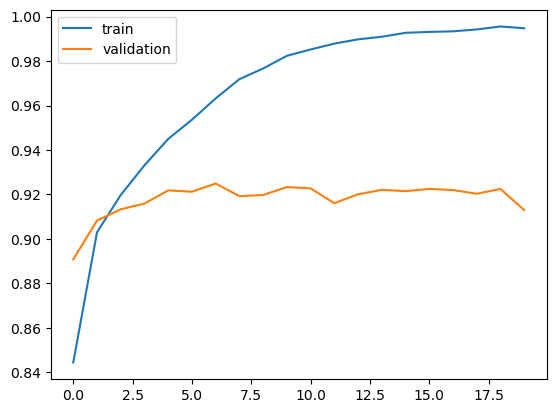

In [26]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [24]:
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9106 - loss: 0.6220


[0.6332215070724487, 0.9111999869346619]

In [25]:
pred_prob = model.predict(np.expand_dims(test_images[7000], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[5.7006612e-29 1.9848518e-28 1.3613138e-20 4.8869626e-30 1.7366356e-28
  5.2473857e-23 4.8321827e-38 6.5384158e-27 1.0000000e+00 2.7665121e-27]]


### Dropout 실시

In [34]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

INPUT_SIZE = 28

# input 
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# 첫 번째 Conv2D 층
conv2d_22 = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# 두 번째 Conv2D 층
conv2d_23 = Conv2D(filters=64, kernel_size=3, strides=1,  activation='relu')(conv2d_22)

# MaxPooling2D 층
max_pooling2d_11 = MaxPooling2D(2)(conv2d_23)

# Flatten 층
flatten_9 = Flatten()(max_pooling2d_11)

# Drop Out 층 -> overfitting 해소 
drop_out = Dropout(rate=0.5)(flatten_9)

# 첫 번째 Dense 층
dense_18 = Dense(50, activation='relu')(drop_out)

# 두 번째 Dense 층 (출력 층)
dense_19 = Dense(10, activation='softmax')(dense_18)


model = Model(inputs=input_tensor, outputs=dense_19)


model.summary()




Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [36]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [38]:
history = model.fit(x=train_images,
                   y=train_oh_targets,
                   batch_size=64,
                   epochs=20,
                   validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - acc: 0.7803 - loss: 0.6205 - val_acc: 0.8877 - val_loss: 0.3123
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.8839 - loss: 0.3233 - val_acc: 0.8997 - val_loss: 0.2732
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - acc: 0.9020 - loss: 0.2711 - val_acc: 0.9006 - val_loss: 0.2634
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.9154 - loss: 0.2297 - val_acc: 0.9009 - val_loss: 0.2579
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - acc: 0.9218 - loss: 0.2133 - val_acc: 0.9218 - val_loss: 0.2187
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - acc: 0.9326 - loss: 0.1785 - val_acc: 0.9233 - val_loss: 0.2168
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - acc: 0.9383 - loss: 0.1617 - val_acc: 0.9185 - val_loss: 0.2303
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - acc: 0.9452 - loss: 0.1470 - val_acc: 0.9220 - val_loss: 0.2211
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

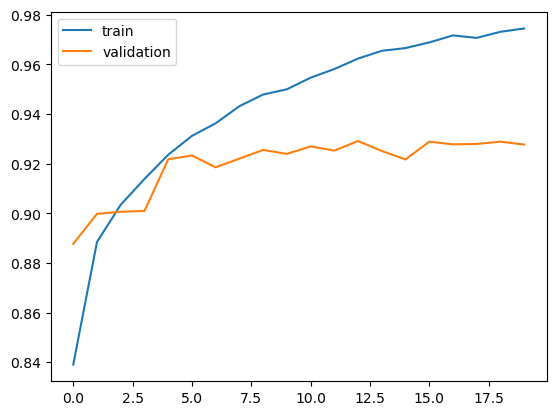

In [39]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [40]:
# 313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9106 - loss: 0.6220

# [0.6332215070724487, 0.9111999869346619]

model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9274 - loss: 0.2792


[0.2791306674480438, 0.9272000193595886]

In [41]:
pred_prob = model.predict(np.expand_dims(test_images[7000], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[3.0586895e-19 1.0521849e-23 4.9569819e-20 1.5984754e-25 2.5952465e-16
  6.2719488e-21 5.1347686e-25 2.0991698e-17 1.0000000e+00 1.3455888e-18]]


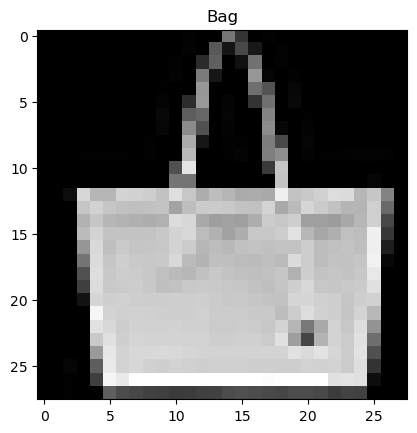

In [43]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(test_images[7000], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()